# Machine Learning Lab 4 :- Decision Trees
<hr/>

**Submitted by:-** <br>

Name: **Naveen N S** <br>
Register Number: **20112045** <br>
Class: **4BSCDS** <br> 
<hr/>

# Lab Overview
------------------------------
- Constructing a decision tree for classifying Any Dataset of our choice.
- Finding out which gives better performance - Gini Index or Entropy Method? Print the Accuracy Score and Confusion Matrix to justifying our answer.
- Finding the Depth of the Tree, How many Leaves are present in the same?

# Problem Definition
--------------------------------------

## Constructing Decision Tree for HR Attrition Dataset

### Problem Approach
---------------------
- Importing necessary Libraries
- Performing EDA
- Getting the decision tree classifier with gini_index and entropy information gain as critirion
- plotting the decision tree
- comparing accuracy and confusion matrix obtained with gini_index and entropy methods

In [161]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier                          # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split                     # Import train_test_split function
from sklearn.metrics import accuracy_score,confusion_matrix             #Import scikit-learn metrics module for 
import seaborn as sns                                                  #accuracy calculation
import matplotlib.pyplot as plt
from sympy import Matrix

In [143]:
#importing dataset 

df = pd.read_csv("HR_Employee_Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

**Performing Basic EDA**

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [120]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [121]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [122]:
numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

In [123]:
df[numeric_columns].describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [126]:
#correlation
data[numeric_columns].corr(method='pearson')

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

**Visualisation**

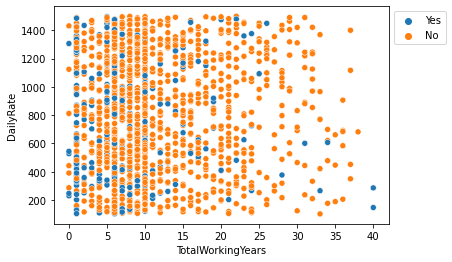

In [131]:
#scatterplot
sns.scatterplot(x='TotalWorkingYears', y='DailyRate',hue='Attrition', data=data)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

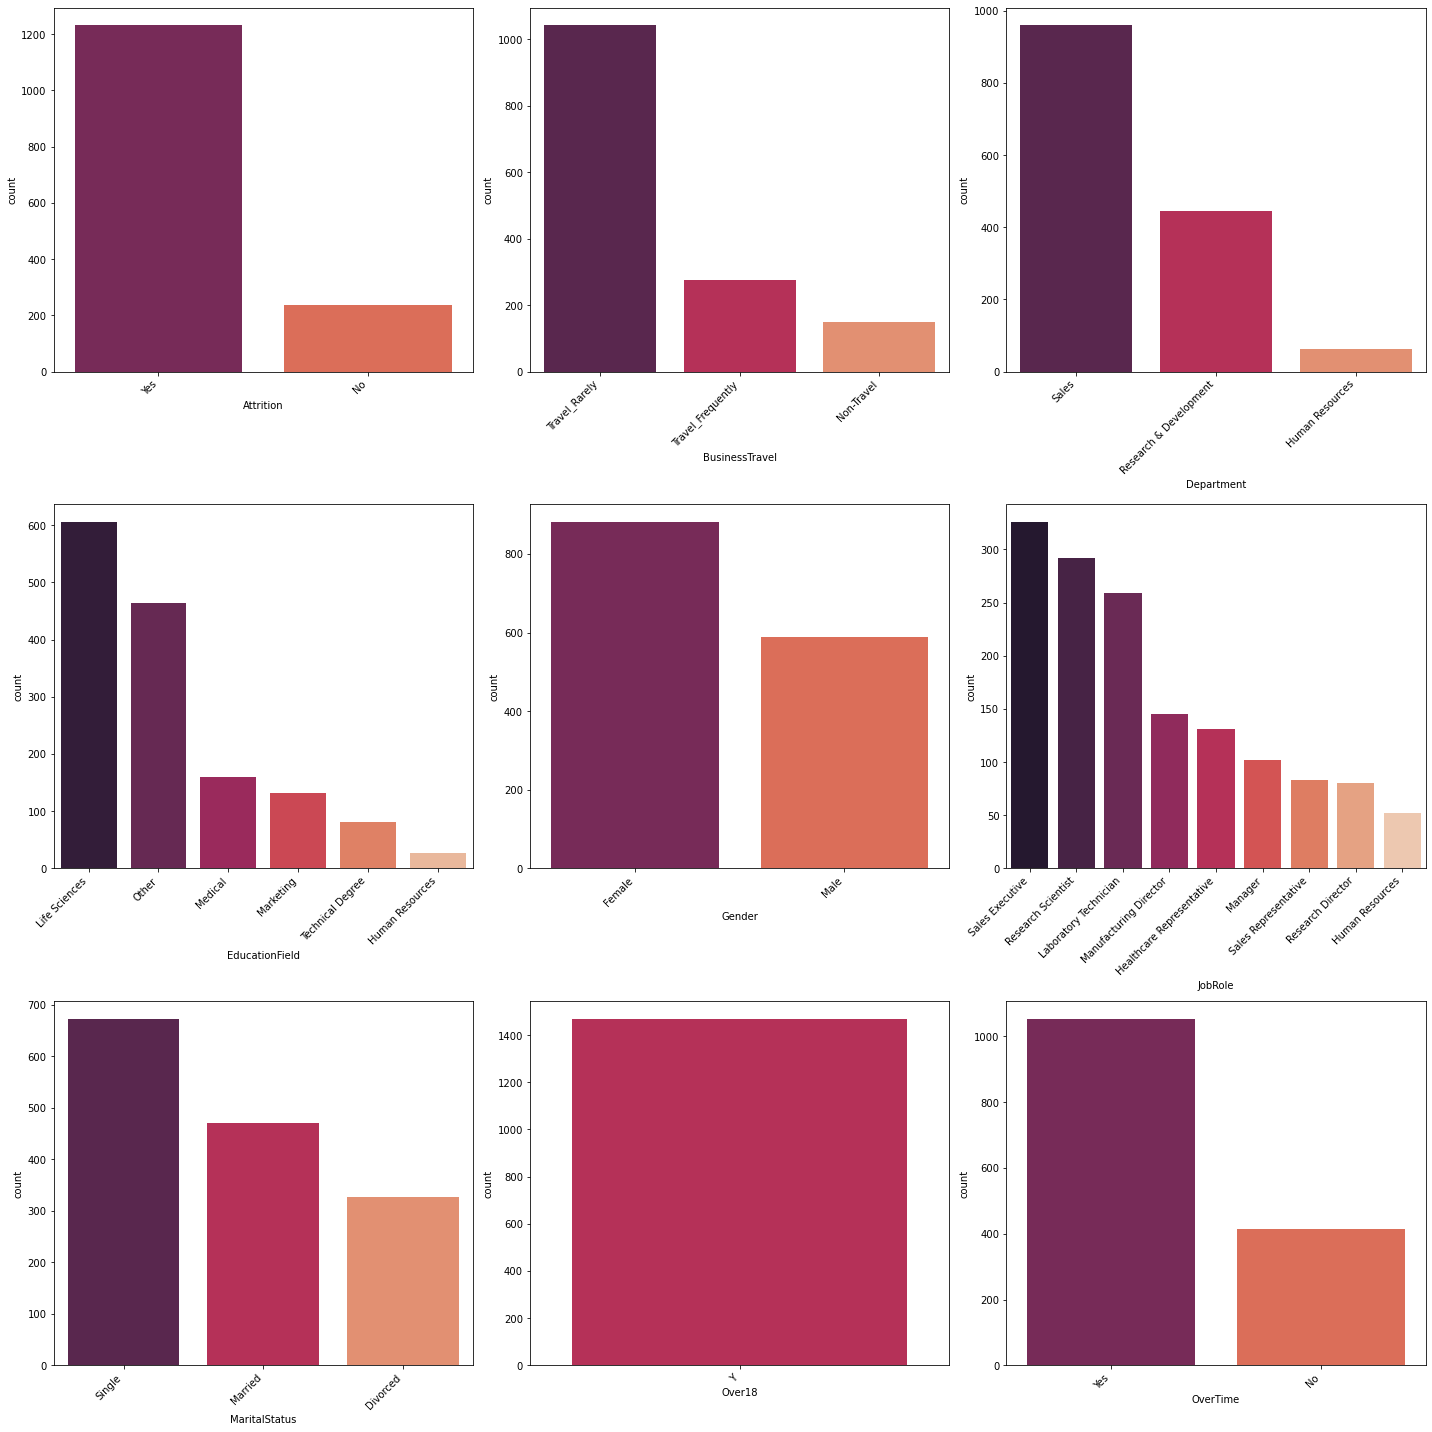

In [132]:
#countplotb
fig, ax = plt.subplots(3,3, figsize = (20,20))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i],
                  palette="rocket", order = data[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

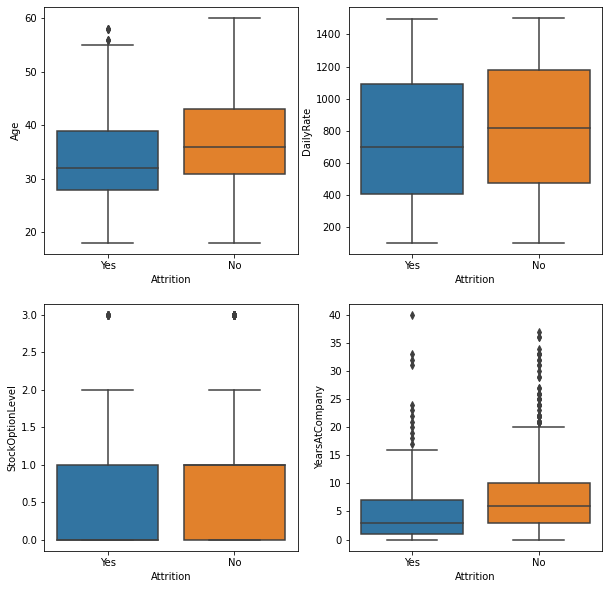

In [133]:
#boxplot
def graph(y):
    sns.boxplot(x="Attrition", y=y, data=data)

plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Age')
  
plt.subplot(222)
graph('DailyRate')
  
plt.subplot(223)
graph('StockOptionLevel')
  
plt.subplot(224)
graph('YearsAtCompany')
  
plt.show()

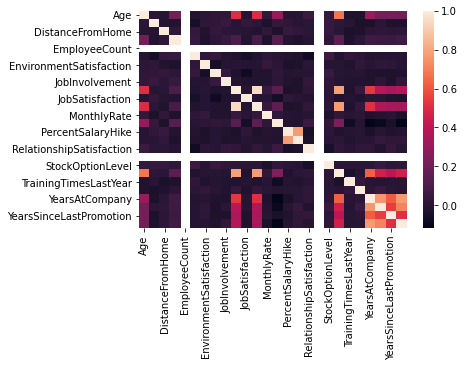

In [134]:
#heatmap
sns.heatmap(data.corr(method='pearson'));
  
plt.show()

**Our Target will be whether the employee will leave the company or not**

In [148]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

cat_var = ["Department","EducationField","Gender","BusinessTravel","JobRole","MaritalStatus","Over18",
          "OverTime"]

for var in cat_var:
    # Using .fit_transform function to fit label
    # encoder and return encoded label
    label = le.fit_transform(data[var])

    # removing the column 'Purchased' from df
    # as it is of no use now.
    df.drop(var, axis=1, inplace=True)

    # Appending the array to our dataFrame
    # with column name 'Purchased'
    df[var] = label

df

Age Attrition  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       Yes       1102                 1          2              1   
1      49        No        279                 8          1              1   
2      37       Yes       1373                 2          2              1   
3      33        No       1392                 3          4              1   
4      27        No        591                 2          1              1   
...   ...       ...        ...               ...        ...            ...   
1465   36        No        884                23          2              1   
1466   39        No        613                 6          1              1   
1467   27        No        155                 4          3              1   
1468   49        No       1023                 2          3              1   
1469   34        No        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      ...  YearsSinceLastPromotion  YearsWithCurrManager  Department  \
0     ...                        0                     5           2   
1     ...                        1                     7           1   
2     ...                        0                     0           1   
3     ...                        3                     0           1   
4     ...                        2                     2           1   
...   ...                      ...                   ...         ...   
1465  ...                        0                     3           1   
1466  ...                        1                     7           1   
1467  ...                        0                     3           1   
1468  ...                        0                     8           2   
1469  ...                        1                     2           1   

      EducationField  Gender  BusinessTravel  JobRole  MaritalStatus  Over18  \
0                  1       0               2        7              2       0   
1                  1       1               1        6              1       0   
2                  4       1               2        2              2       0   
3                  1       0               1        6              1       0   
4                  3       1               2        2              1       0   
...              ...     ...             ...      ...            ...     ...   
1465               3       1               1        2              1       0   
1466               3       1               2        0              1       0   
1467               1       1               2        4              1       0   
1468               3       1               1        7              1       0   
1469               3       1               2        2              1       0   

      OverTime  
0            1  
1            0  
2            1  
3            1  
4            0  
...        ...  
1465         0  
1466         0  
1467         1  
1468         0  
1469         0  

[1470 rows x 35 columns]

In [149]:
print("*"*100)
print("FEATURES".center(100))
print("*"*100)

# getting feature dataset
X = df.drop(["Attrition"],axis=1)
X

****************************************************************************************************
                                              FEATURES                                              
****************************************************************************************************


Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  ...  YearsSinceLastPromotion  YearsWithCurrManager  \
0            2  ...                        0                     5   
1            2  ...                        1                     7   
2            1  ...                        0                     0   
3            1  ...                        3                     0   
4            1  ...                        2                     2   
...        ...  ...                      ...                   ...   
1465         2  ...                        0                     3   
1466         3  ...                        1                     7   
1467         2  ...                        0                     3   
1468         2  ...                        0                     8   
1469         2  ...                        1                     2   

      Department  EducationField  Gender  BusinessTravel  JobRole  \
0              2               1       0               2        7   
1              1               1       1               1        6   
2              1               4       1               2        2   
3              1               1       0               1        6   
4              1               3       1               2        2   
...          ...             ...     ...             ...      ...   
1465           1               3       1               1        2   
1466           1               3       1               2        0   
1467           1               1       1               2        4   
1468           2               3       1               1        7   
1469           1               3       1               2        2   

      MaritalStatus  Over18  OverTime  
0                 2       0         1  
1                 1       0         0  
2                 2       0         1  
3                 1       0         1  
4                 1       0         0  
...             ...     ...       ...  
1465              1       0         0  
1466              1       0         0  
1467              1       0         1  
1468              1       0         0  
1469              1       0         0  

[1470 rows x 34 columns]

In [150]:
print("*"*100)
print("TARGET".center(100))
print("*"*100)
# getting target dataset
y = df["Attrition"]
y

****************************************************************************************************
                                               TARGET                                               
****************************************************************************************************


0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [206]:
feature_cols = ['Age','BusinessTravel','DailyRate','DistanceFromHome','Education','EmployeeCount',
               'EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel',
               'Gender','Department','EducationField','EnvironmentSatisfaction','JobRole','MaritalStatus',
               'MonthlyIncome','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating',
                'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
               'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
               'YearsWithCurrManager','MonthlyRate']

len(feature_cols)

34

**DECISION TREE CLASSIFIER USING GINI INDEX**

In [247]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [248]:
# perform training with giniIndex
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini")
# Fit the model 
clf_gini.fit(X_train, y_train) 

DecisionTreeClassifier()

DEPTH AND LEAVES WITH GINI METHOD

In [249]:
print('DEPTH OF THE TREE WITH GINI INDEX:',clf_gini.get_depth())
print("-"*50)
print("NUMBER OF LEAVES WITH GINI INDEX:",clf_gini.get_n_leaves())

DEPTH OF THE TREE WITH GINI INDEX: 14
--------------------------------------------------
NUMBER OF LEAVES WITH GINI INDEX: 121


EVALUATION METRICS FOR GINI METHOD

In [257]:
# Function to make predictions 
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    return y_pred

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print("*"*50)
    print("ACCURACY USING GINI METHOD".center(50))
    print("*"*50)
    print(accuracy_score(y_test,y_pred)*100)

# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

mat = confusion_matrix(y_test,y_pred_gini)
matt = Matrix(mat)

print("*"*50)
print("CONFUSION MATRIX".center(50))
print("*"*50)
matt

**************************************************
            ACCURACY USING GINI METHOD            
**************************************************
78.2312925170068
**************************************************
                 CONFUSION MATRIX                 
**************************************************


Matrix([
[319, 45],
[ 51, 26]])

PLOTTING DECISION TREE WITH GINI INDEX METHOD

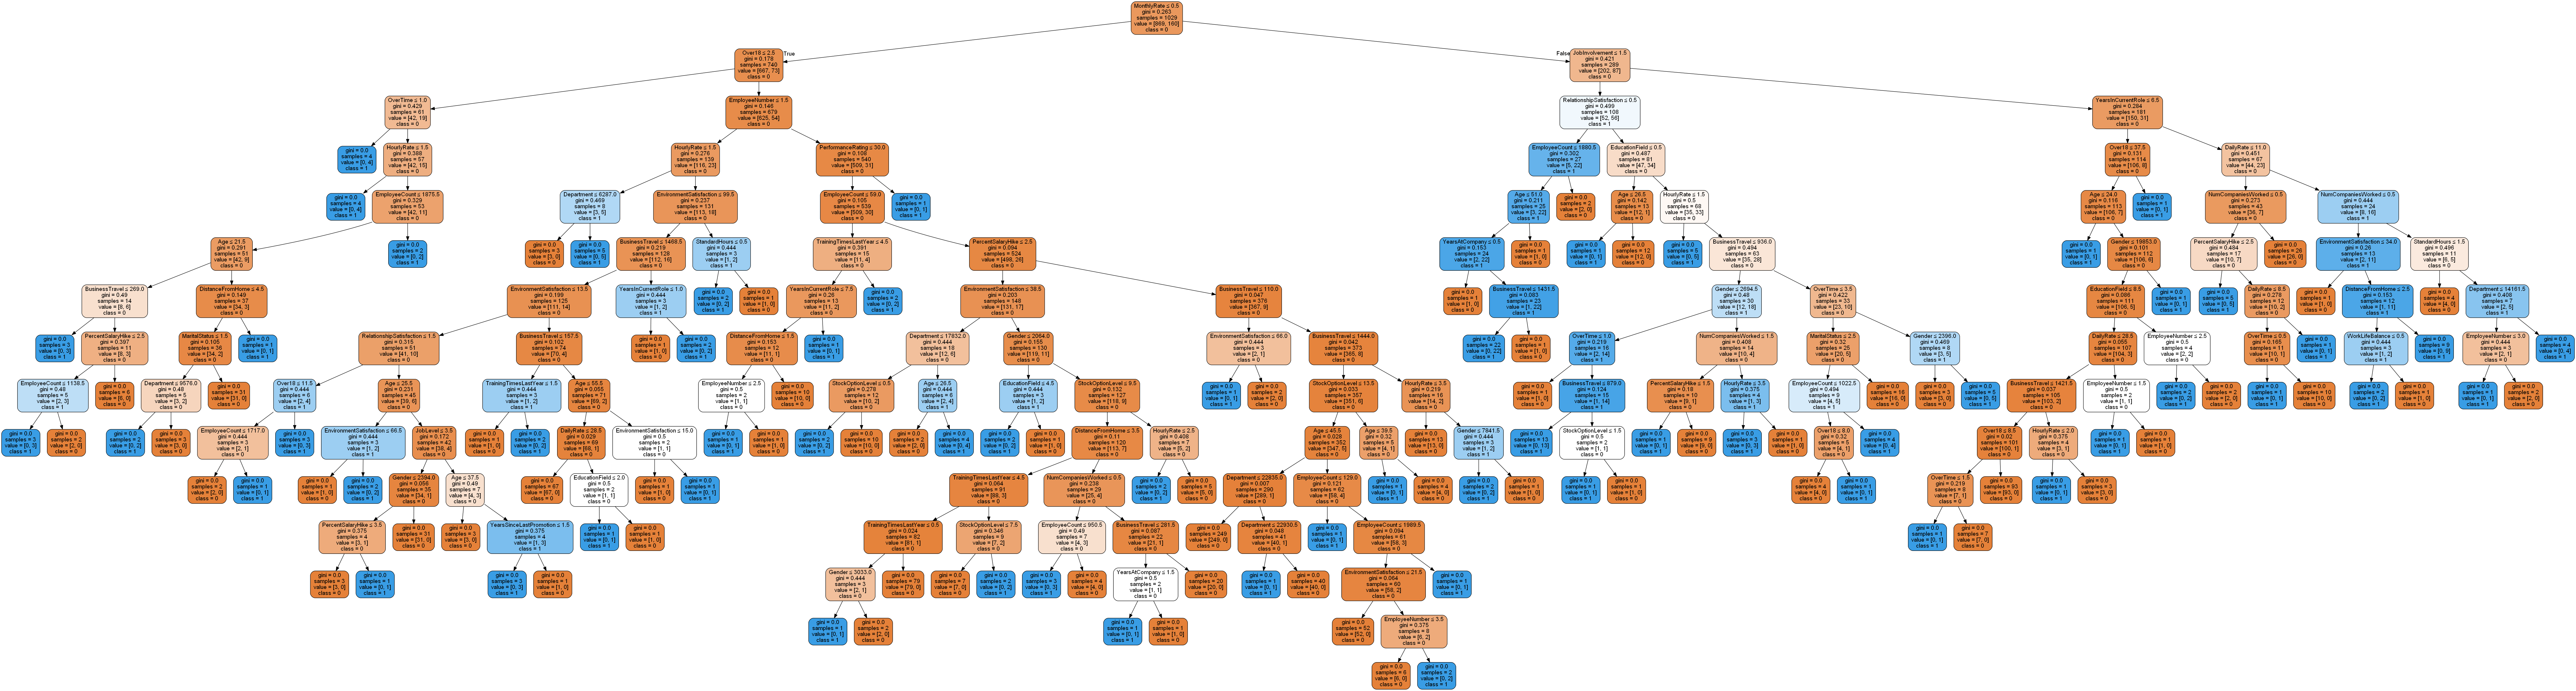

In [250]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hr_attrition.png')
Image(graph.create_png())

**DECISION TREE USING ENTROPY INFORMATION GAIN METHOD**

In [242]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [243]:
# perform training with entropy

# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy")

# Fit the model  
clf_entropy.fit(X_train,y_train) 

DecisionTreeClassifier(criterion='entropy')

EVALUATION METRICS FOR ENTROPY METHOD

In [261]:
# Function to make predictions 
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    return y_pred

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print("*"*50)
    print("ACCURACY USING ENTROPY INFORMATION GAIN METHOD".center(50))
    print("*"*50)
    print(accuracy_score(y_test,y_pred)*100)

# Prediction using gini 
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

print()

mat = confusion_matrix(y_test,y_pred_entropy)
matt = Matrix(mat)

print("*"*50)
print("CONFUSION MATRIX".center(50))
print("*"*50)
matt

**************************************************
  ACCURACY USING ENTROPY INFORMATION GAIN METHOD  
**************************************************
77.09750566893425

**************************************************
                 CONFUSION MATRIX                 
**************************************************


Matrix([
[310, 54],
[ 47, 30]])

DEPTH AND LEAVES WITH ENTROPY METHOD

In [245]:
print('DEPTH OF THE TREE USING ENTROPY INFORMATION GAIN METHOD:',clf_entropy.get_depth())
print("-"*70)
print("NUMBER OF LEAVES USING ENTROPY INFORMATION GAIN METHOD:",clf_entropy.get_n_leaves())

DEPTH OF THE TREE USING ENTROPY INFORMATION GAIN METHOD: 15
----------------------------------------------------------------------
NUMBER OF LEAVES USING ENTROPY INFORMATION GAIN METHOD: 106


PLOTTING DECISION TREE WITH ENTROPY INFORMATION GAIN METHOD

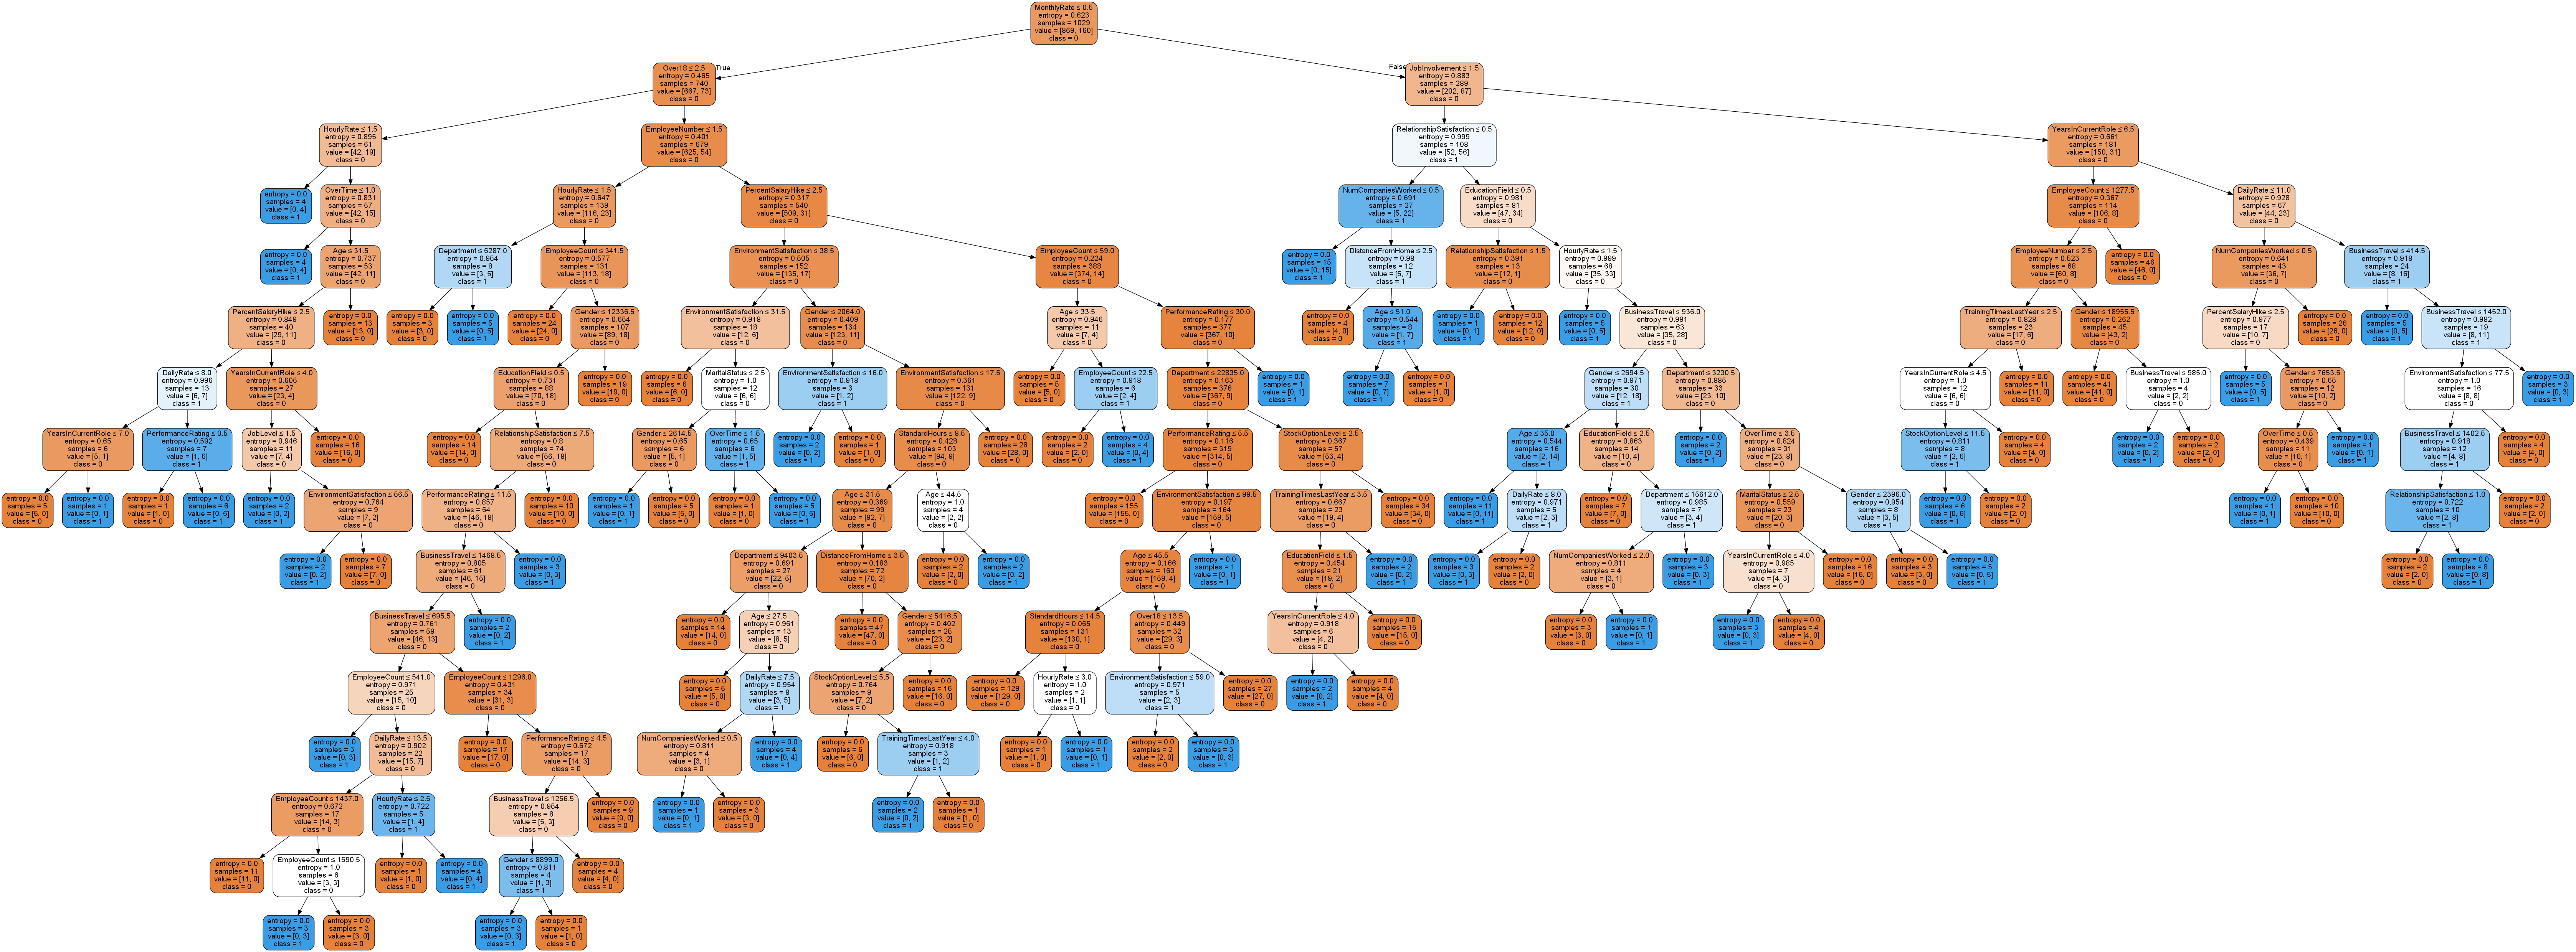

In [246]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hr_attrition1.png')
Image(graph.create_png())

## RESULTS
------------------------

**ACCURACY WITH GINI_INDEX METHOD:**             78.23
<br>
**ACCURACY WITH ENTROPY INFORMATION GAIN METHOD:** 77.09

<br>
Thus, we can conclude that using a decision tree formed with gini_index method is more accurate for the following dataset

# References
----------------------------------
- https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit
- https://www.datacamp.com/tutorial/decision-tree-classification-python
- https://stackoverflow.com/questions/36979421/how-can-i-use-conda-to-install-pydotplus
- https://www.numpyninja.com/post/detection-of-heart-disease-using-decision-tree-classifier

# Conclusion
--------------------------------
- Learnt how to implement decision tree with different critions
- Learnt the concepts of gini impurity and entropy-information_gain methods of creating decision tree